In [1]:
pip install keras

     |████████████████████████████████| 1.3 MB 2.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
ls

BLOCKS/             Notatki.txt            UPSCALED_FRAMES/
bsc_notka.txt       possible_methods.txt   VIDEOS/
CNN_model.ipynb     prepare_data.sh*       yt_backup.txt
common.sh*          __pycache__/           yt_service.py*
DATASET/            run_all.sh*            yt_videos_to_download.txt
extract_frames.sh*  split_into_blocks.sh*
FRAMES/             upscale_4k.sh*


In [3]:
from pathlib import Path

In [4]:
p = Path('DATASET')

In [5]:
for directory in p.iterdir():
    print(directory)

DATASET/360p
DATASET/144p
DATASET/240p
DATASET/1440p
DATASET/480p
DATASET/1080p
DATASET/720p
DATASET/2160p


In [6]:
image_count = len(list(p.glob('*/*.png')))

In [7]:
print(image_count)

1199484


In [10]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


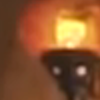

In [14]:
import PIL
import PIL.Image


test_fullhd = list(p.glob('1080p/*'))
PIL.Image.open(str(test_fullhd[0]))

In [69]:
batch_size = 32
img_height = 100
img_width = 100

In [70]:
pip install tensorflow tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [71]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [72]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  p,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1199484 files belonging to 8 classes.
Using 959588 files for training.


In [73]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  p,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1199484 files belonging to 8 classes.
Using 239896 files for validation.


In [74]:
class_names = train_ds.class_names
print(class_names)


['1080p', '1440p', '144p', '2160p', '240p', '360p', '480p', '720p']


In [75]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


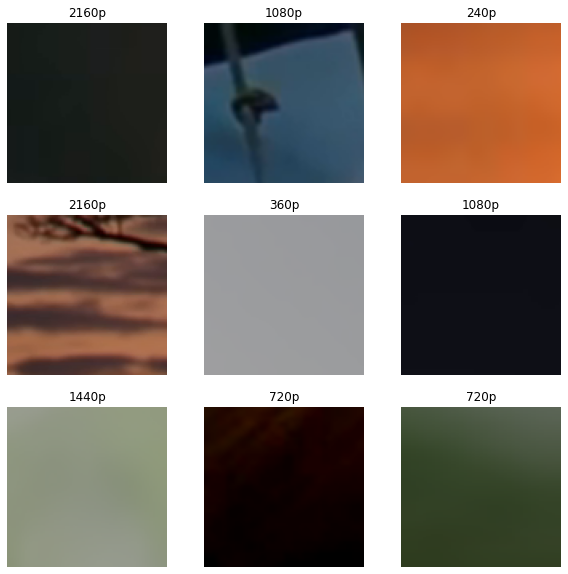

In [76]:
import matplotlib.pyplot as plt
list_for_check = []
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [77]:
for images_batch, labels_batch in train_ds:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(32, 100, 100, 3)
(32,)


In [78]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [79]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.09019608 0.34117648


In [80]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [81]:
num_classes = 8

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [82]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
 2481/29988 [=>............................] - ETA: 1:47:40 - loss: 1.9875 - accuracy: 0.1832